In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Weddell_Extent = pd.read_excel(filepath, sheet_name='Weddell-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Weddell_Extent)
fp.date_time(Weddell_Extent)

,Extent,Date
0,2136510.859,1979-01-01
1,1243495.891,1979-02-01
2,1699053.449,1979-03-01
3,2617442.085,1979-04-01
4,3852934.206,1979-05-01
...,...,...
533,3668127.143,2023-06-01
534,4805519.784,2023-07-01
535,5524445.234,2023-08-01
536,6006669.861,2023-09-01


In [5]:
scaler = MinMaxScaler()
Weddell_Extent['Extent'] = scaler.fit_transform(Weddell_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 11
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Weddell_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((516, 12, 1), (516,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Weddell_model_LT11/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
49/53 [==========================>...] - ETA: 0s - loss: 0.3431 - root_mean_squared_error: 0.5858

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 8s 99ms/step - loss: 0.3392 - root_mean_squared_error: 0.5824 - val_loss: 0.2691 - val_root_mean_squared_error: 0.5188
Epoch 2/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2279 - root_mean_squared_error: 0.4774

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.2247 - root_mean_squared_error: 0.4740 - val_loss: 0.2301 - val_root_mean_squared_error: 0.4797
Epoch 3/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1763 - root_mean_squared_error: 0.4199

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.1759 - root_mean_squared_error: 0.4194 - val_loss: 0.1963 - val_root_mean_squared_error: 0.4430
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1370 - root_mean_squared_error: 0.3701

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.1425 - root_mean_squared_error: 0.3775 - val_loss: 0.1653 - val_root_mean_squared_error: 0.4066
Epoch 5/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1188 - root_mean_squared_error: 0.3447

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.1172 - root_mean_squared_error: 0.3423 - val_loss: 0.1374 - val_root_mean_squared_error: 0.3707
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0908 - root_mean_squared_error: 0.3014

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0899 - root_mean_squared_error: 0.2998 - val_loss: 0.1132 - val_root_mean_squared_error: 0.3364
Epoch 7/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0707 - root_mean_squared_error: 0.2659

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0683 - root_mean_squared_error: 0.2613 - val_loss: 0.0920 - val_root_mean_squared_error: 0.3032
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0526 - root_mean_squared_error: 0.2294

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 86ms/step - loss: 0.0519 - root_mean_squared_error: 0.2278 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2699
Epoch 9/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0416 - root_mean_squared_error: 0.2039

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0409 - root_mean_squared_error: 0.2023 - val_loss: 0.0549 - val_root_mean_squared_error: 0.2344
Epoch 10/50
53/53 [==============================] - ETA: 0s - loss: 0.0349 - root_mean_squared_error: 0.1869

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0349 - root_mean_squared_error: 0.1869 - val_loss: 0.0383 - val_root_mean_squared_error: 0.1958
Epoch 11/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0251 - root_mean_squared_error: 0.1584

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0256 - root_mean_squared_error: 0.1599 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 12/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0218 - root_mean_squared_error: 0.1476

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0224 - root_mean_squared_error: 0.1498 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0186 - root_mean_squared_error: 0.1362

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1112
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1251

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0157 - root_mean_squared_error: 0.1251 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0904
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.1097

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0732
Epoch 16/50
53/53 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1213

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642
Epoch 17/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.1243

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0616
Epoch 18/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1036

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0105 - root_mean_squared_error: 0.1027 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 19/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.1305

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0159 - root_mean_squared_error: 0.1262 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0169 - root_mean_squared_error: 0.1300 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0805
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0131 - root_mean_squared_error: 0.1144 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733
Epoch 23/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1212

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0148 - root_mean_squared_error: 0.1216 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0570
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0139 - root_mean_squared_error: 0.1178 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0668
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0118 - root_mean_squared_error: 0.1086 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0133 - root_mean_squared_error: 0.1151 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0800
Epoch 28/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0030 - val_root_mean_squared

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0532
Epoch 39/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.1071

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0531
Epoch 40/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0131 - root_mean_squared_error: 0.1145 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0604
Epoch 41/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.1177

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518
Epoch 42/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0742
Epoch 43/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0113 - root_mean_squared_error: 0.1063 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0636
Epoch 44/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 45/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0524
Epoch 46/50
52/53 [============================>.] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1149

INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


INFO:tensorflow:Assets written to: Weddell_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503
Epoch 47/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0114 - root_mean_squared_error: 0.1069 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0716
Epoch 48/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0157 - root_mean_squared_error: 0.1252 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0810
Epoch 49/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0796
Epoch 50/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0102 - root_mean_squared_error: 0.1008 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

2.026359808444977 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

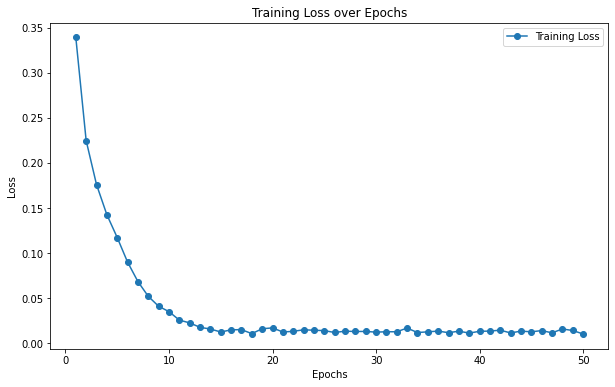

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

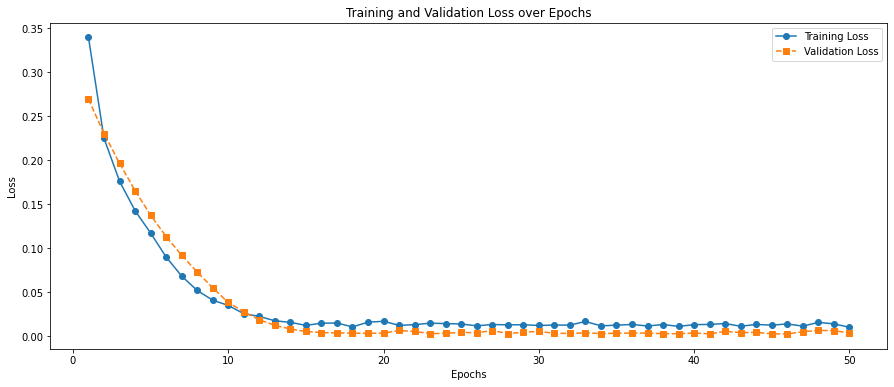

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Weddell_model_LT11/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.06600371224325811
MAE : 0.04942323027354372


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1751978.500,1527666.815
1,2370436.500,2121949.701
2,3324760.250,3562381.775
3,4826636.500,5004305.983
4,5770003.000,6176613.878
5,6399955.500,6794233.093
6,6563045.500,7024136.637
7,6475921.000,6554271.388
8,5548792.500,6172281.701
9,3393077.750,4175225.799


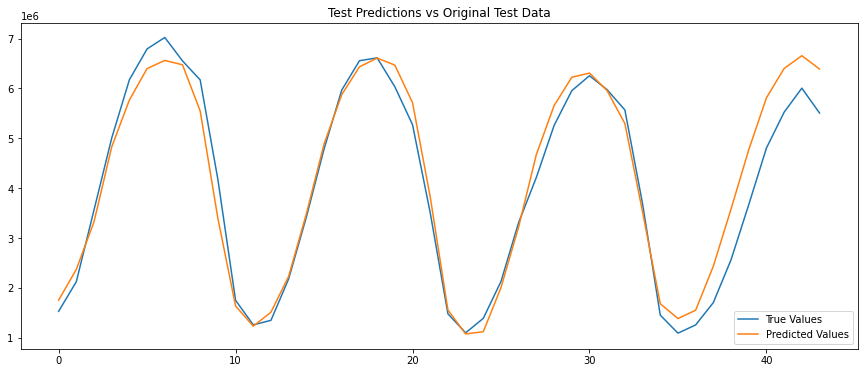

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

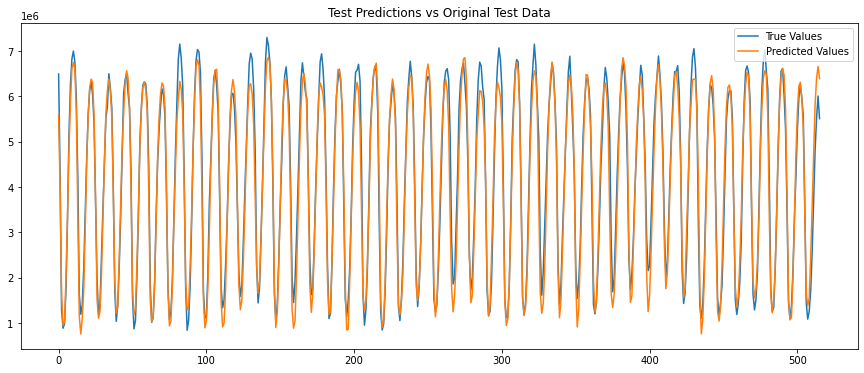

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()